## Problem Statement:

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 


### Importing libraries

In [71]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

from sklearn.preprocessing import PowerTransformer,StandardScaler,LabelEncoder

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,LeaveOneOut,KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix,precision_score,recall_score,precision_recall_curve,classification_report,accuracy_score,auc,roc_auc_score,roc_curve,plot_roc_curve
from imblearn.over_sampling import SMOTE

import pickle

import warnings
warnings.filterwarnings("ignore")

In [80]:
data=pd.read_csv("D:\\fliprobo\\project\\P2\Micro Credit Project\\Data file.csv",index_col="Unnamed: 0")
data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


Showing top 5 records of the dataset.

In [81]:
data.columns.tolist()

['label',
 'msisdn',
 'aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'payback30',
 'payback90',
 'pcircle',
 'pdate']

### Column Description:
label: Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}

msisdn: mobile number of user

aon: age on cellular network in days

daily_decr30::Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

daily_decr90::Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

rental30:Average main account balance over last 30 days

rental90:Average main account balance over last 90 days

last_rech_date_ma: Number of days till last recharge of main account

last_rech_date_da: Number of days till last recharge of data account

last_rech_amt_ma:Amount of last recharge of main account (in Indonesian Rupiah)

cnt_ma_rech30: Number of times main account got recharged in last 30 days

fr_ma_rech30: Frequency of main account recharged in last 30 days

sumamnt_ma_rech30: Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

medianamnt_ma_rech30: Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
 
medianmarechprebal30:Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

cnt_ma_rech90:Number of times main account got recharged in last 90 days

fr_ma_rech90:Frequency of main account recharged in last 90 days

sumamnt_ma_rech90:Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)

medianamnt_ma_rech90:Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)

medianmarechprebal90:Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

cnt_da_rech30:Number of times data account got recharged in last 30 days

fr_da_rech30:Frequency of data account recharged in last 30 days

cnt_da_rech90:Number of times data account got recharged in last 90 days

fr_da_rech90:Frequency of data account recharged in last 90 days

cnt_loans30: Number of loans taken by user in last 30 days.

amnt_loans30:Total amount of loans taken by user in last 30 days

maxamnt_loans30:maximum amount of loan taken by the user in last 30 days

medianamnt_loans30:Median of amounts of loan taken by the user in last 30 days

cnt_loans90:Number of loans taken by user in last 90 days

amnt_loans90:Total amount of loans taken by user in last 90 days

maxamnt_loans90:maximum amount of loan taken by the user in last 90 days

medianamnt_loans90:Median of amounts of loan taken by the user in last 90 days

payback30:Average payback time in days over last 30 days

payback90:Average payback time in days over last 90 days

pcircle:telecom circle

pdate:date

In [82]:
data.shape

(209593, 36)

The data has 209593 no. of records and 36 attributes/columns.

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209593 entries, 1 to 209593
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

All columns has no null values there 12 integer types of columns, 21 float type colmns and 3 object type columns.

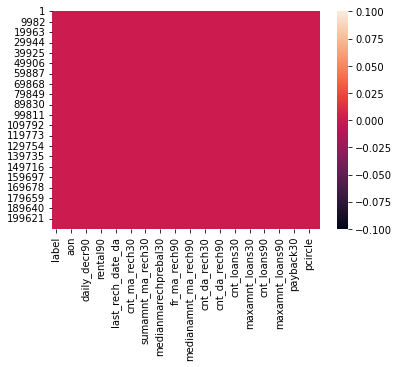

In [84]:
sns.heatmap(data.isna())
plt.show()

No-null Values showing through heatmap.

In [85]:
data.nunique()

label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback3

No. of uniques values consisting in all columns.

In [86]:
data['pcircle'].unique()

array(['UPW'], dtype=object)

 Here we can see that pcircle is the telecom circle that is same for all credit card holder.

In [87]:
for col in data:
    print(f"{col} has no. of unique values::\n{data[col].value_counts()}")
    print('-'*50)
    print('-'*50)

label has no. of unique values::
1    183431
0     26162
Name: label, dtype: int64
--------------------------------------------------
--------------------------------------------------
msisdn has no. of unique values::
04581I85330    7
47819I90840    7
30080I90588    6
55809I89238    6
22038I88658    6
              ..
36902I90840    1
17447I88689    1
59686I90584    1
00504I91190    1
65061I85339    1
Name: msisdn, Length: 186243, dtype: int64
--------------------------------------------------
--------------------------------------------------
aon has no. of unique values::
95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
977092.351997      1
645851.038396      1
881623.815396      1
555267.797667      1
811881.372822      1
Name: aon, Length: 4507, dtype: int64
--------------------------------------------------
--------------------------------------------------
daily_decr30 has no. of unique values::
0.00000

the msisdn no should be unique. As the individual user have the unique msisdn no to be used to credit the loan.

In [88]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000


As we can see that there is high variannce in mostly all columns i.e.  std > mean in mostly all columns.

in aon there should be no negative values as days shouldn't be negative ans max values for this are too high A user should use max for 10 years.

In daily_decr30&90 : in this the amount spent shouldn't be negative removing such values too.

last_rech_date_ma&last_rech_date_da in this the days shouldn't be negative. and max values should be 3600.

fr_ma_rech30,cnt_da_rech30,fr_da_rech30,maxamnt_loans30,cnt_loans90,medianmarechprebal30: max values is seems to be inappropriate of these columns.



## EDA

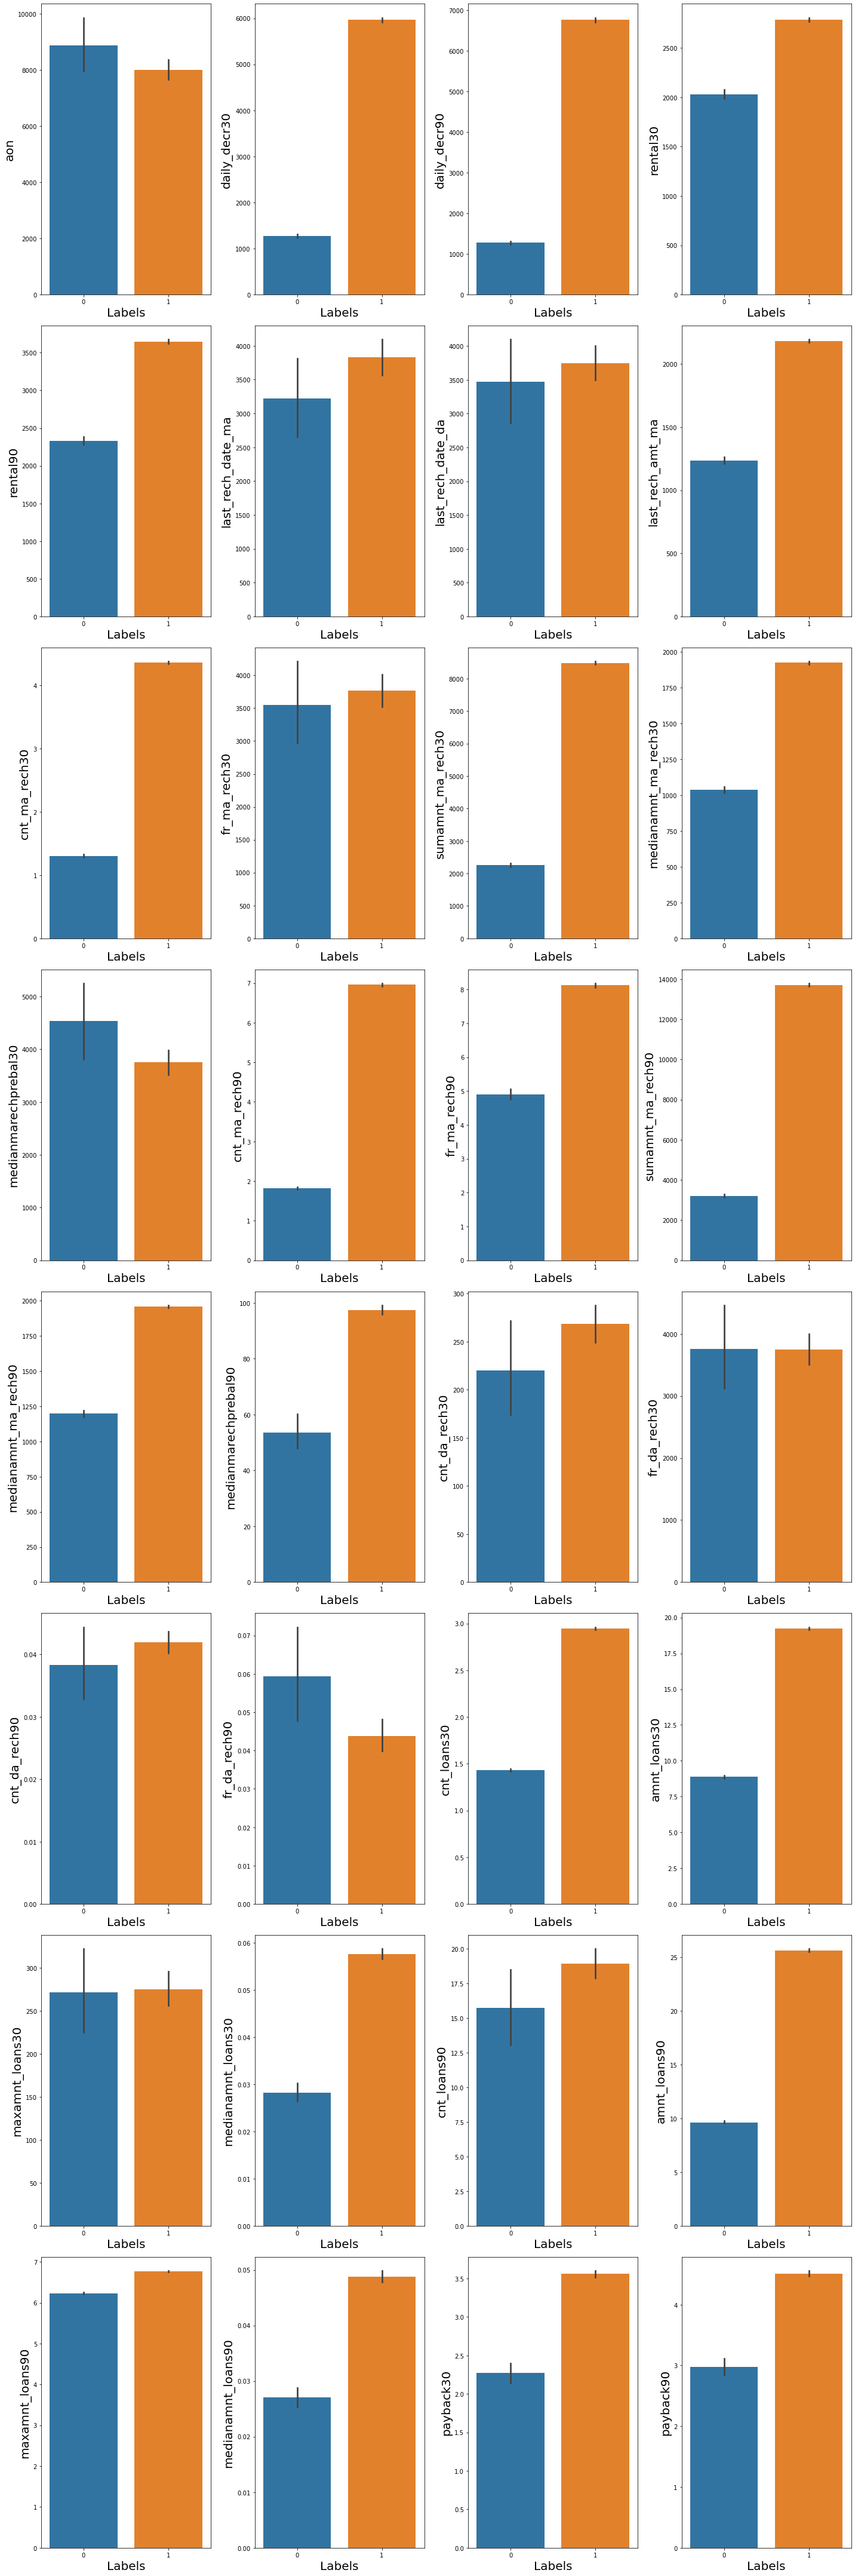

In [104]:
fig=plt.figure(figsize=(20,60))
g=1
for col in data.iloc[:,2:-2]:
    if g<=32:
        ax=plt.subplot(8,4,g)
        sns.barplot(data['label'],data[col])
        plt.xlabel("Labels",fontsize=20)
        plt.ylabel(col,fontsize=20)
    g+=1
plt.tight_layout()

#### Observations:

Maximum Users who paid bill having aon values has maximum 8000 age on its cellular networks.

Daily amount spent from main account, averaged over last 30/90 days (in Indonesian Rupiah) who are maximum defaulter  are in range of 1000 to 1200.  

Average main account balance over last 30 days are having maximum 2000 are the maximum no. of defaulters while over 90 days the maximum defaulter having maximum main account balance in range of 2000-2500 . 

Number of days till last recharge of main account for defaulter having max in range off 3700 to 3800 while for data account we didn't get much info we plot more graphs for data account. #

Defaulter has done maximum last recharge for main account (in Indonesian Rupiah) is in range of 1200-1300 while other users done more than 2500.

Defaulter has recharge maximum 1-2 times while others user recharges their credit for more than 4 times in a month.

defaulters has total amount of recharge in main account over last 30 days maximum in range 2200 -2300 while other users recharged their main account with summition more than 8000.

defaulters has median amount of recharge in main account over last 30 days maximum in range 100 -1050 while other users recharged their main account with summition more than 1900.

Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah) for defaulter maximum was more than 5000 while others having approximatly 4000.

Defaulter has recharge maximum 1-2 no. of times main account got recharged in last 90 days while ther users used more han 7 times.

Frequency of main account recharged in last 90 days for defaulter is maximum of 5 while other having of more than 8.

defaulters has total amount of recharge in main account over last 90 days maximum is less than 4000 while other users recharged their main account with summition approx 14000.

defaulters has median amount of recharge in main account over last 90 days maximum in range 1200 -1250 while other users recharged their main account with summition more than 2000.

Median of main account balance just before recharge in last 90 days at user level (in Indonesian Rupiah) for defaulter have maximum approx 60 while others having approximatly 100.

260-270 maximum Number of times data account got recharged in last 30 days by defaulters while other users has more than 270 no. of times the data recharged.

Frequency for data recharge over 90 days for defaulter is more tha 0.07 while other users has approximately 0.05

Number of loans taken by defaulters in last 30 days was approximately 1.5 while other users has approximately 3.0

Total amount of loans taken by defaulter in last 30 days was approx 9 while other users has approx 20.

Median of amounts of loan taken by the defaulters in last 30 days was approx 0.03 while other users has approx 0.06.

Number of loans taken by defaulters in last 30 days has max approx 17.5 while other users has max of approx 20.0 .

Max total amount of loans taken by defaulters in last 30 days is of 10 while other users has taken more than 25.

Max amount of loan taken by the defaulters is approx 6 while others has taken approx 6.6. over 90 days

Max median of amount taken by the defaulters is approx 0.03 while other users has taken approx 0.05 over 90 days.

payback by the defaulter is approx 2.5 while other users payback more than 3  over 30 days

payback by the defaulter is approx 3 while other users payback more than 4  over 90 days

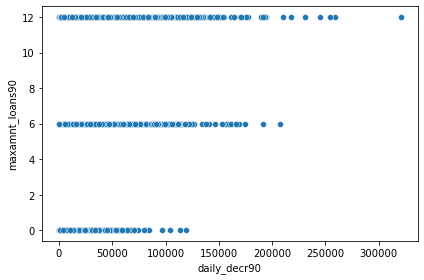

In [12]:
sns.scatterplot(data['daily_decr90'],data['maxamnt_loans90'])
plt.tight_layout()

Here we can see that somehow the max_amnt_loan_over 90 days and daily amount spent over 90 are linear dependent.

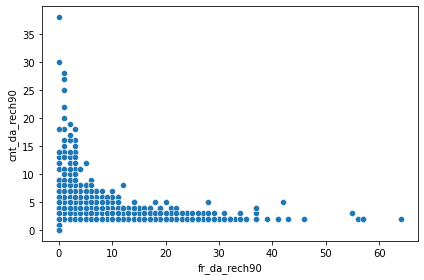

In [13]:
sns.scatterplot(data['fr_da_rech90'],data['cnt_da_rech90'])
plt.tight_layout()

Here we can see that Count of data recharge over 90 days increases w.r.t. decrease in frequency of data recharge over 90 days.

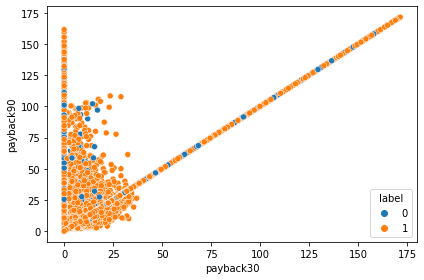

In [14]:
sns.scatterplot(data['payback30'],data['payback90'],hue=data['label'])
plt.tight_layout()

From average payback over 30 days is co-linear with the payback90

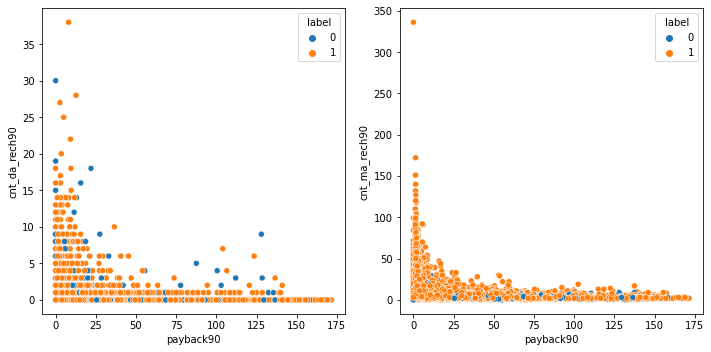

In [100]:
plt.figure(figsize=(10,5))
ax=plt.subplot(1,2,1)
sns.scatterplot(data['payback90'],data['cnt_da_rech90'],hue=data['label'])
ax=plt.subplot(1,2,2)
sns.scatterplot(data['payback90'],data['cnt_ma_rech90'],hue=data['label'])
plt.tight_layout()

There seems some relation that the user pay backs their loans who who had recharge less no. of time for their data account as well as their main account too.

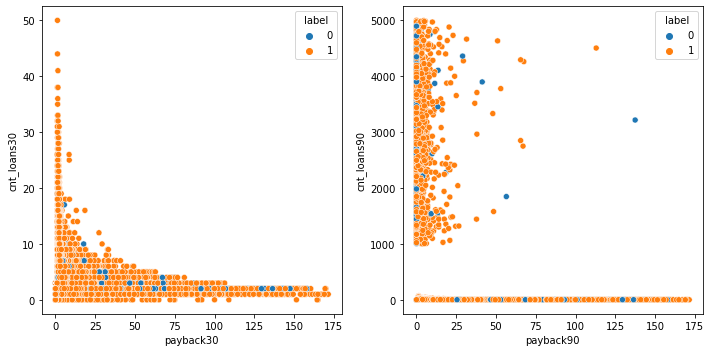

In [102]:
plt.figure(figsize=(10,5))
ax=plt.subplot(1,2,1)
sns.scatterplot(data['payback30'],data['cnt_loans30'],hue=data['label'])
ax=plt.subplot(1,2,2)
sns.scatterplot(data['payback90'],data['cnt_loans90'],hue=data['label'])
plt.tight_layout()

Over 30 days the user highlypay back their loan who has taken less no. of loan.

But over 90 days the user who has taken greater than 1000 times the loans has very rarely paybacks their loans this customer has benefits with the credit cad but there seems to be defaulter too.

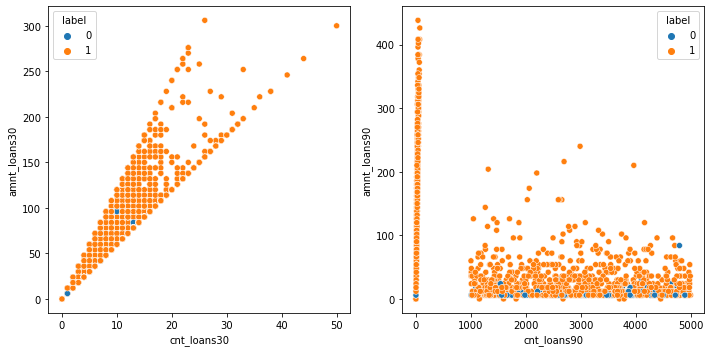

In [101]:
plt.figure(figsize=(10,5))
ax=plt.subplot(1,2,1)
sns.scatterplot(data['cnt_loans30'],data['amnt_loans30'],hue=data['label'])
ax=plt.subplot(1,2,2)
sns.scatterplot(data['cnt_loans90'],data['amnt_loans90'],hue=data['label'])
plt.tight_layout()

Over 30 days the user has has higher amount of loans with respect to increase in the no. of times the loan taken but there is no such relation seems for over 90 days the most of user has overcome the amount of loan taken.

In [106]:
### Transforming Date columns
data['pday']=pd.to_datetime(data['pdate']).dt.day          # pday is the day columns fetching from pdate. 

data['pmonth']=pd.to_datetime(data['pdate']).dt.month      # pmonth is the month columns fetching from pdate. 

data['pyear']=pd.to_datetime(data['pdate']).dt.year        # pyear is the year columns fetching from pdate. 

data['pweek']=pd.to_datetime(data['pdate']).dt.dayofweek   # pweek is the day's week columns fetching from pdate.

<AxesSubplot:xlabel='label', ylabel='pday'>

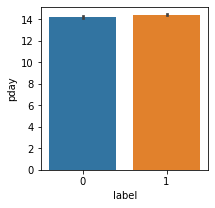

In [17]:
plt.figure(figsize=(3,3))
sns.barplot(data['label'],data['pday'])

<AxesSubplot:xlabel='label', ylabel='pmonth'>

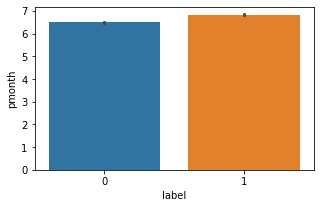

In [18]:
plt.figure(figsize=(5,3))
sns.barplot(data['label'],data['pmonth'])

<AxesSubplot:xlabel='label', ylabel='pweek'>

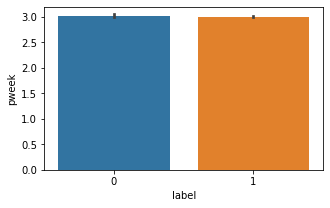

In [19]:
plt.figure(figsize=(5,3))
sns.barplot(data['label'],data['pweek'])

<AxesSubplot:xlabel='pdate'>

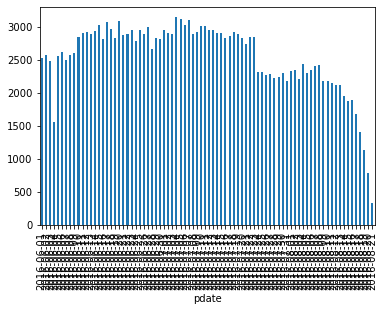

In [20]:
data.groupby('pdate')['label'].count().plot(kind='bar')

From day,month,weeks,pdate there seems no  such relation for  defaulters.

In [107]:
le=LabelEncoder()
data['msisdn']=le.fit_transform(data['msisdn'])     # Used LabelEncoder technique to transform mobile phones and date.
data['pdate']=le.fit_transform(data['pdate'])

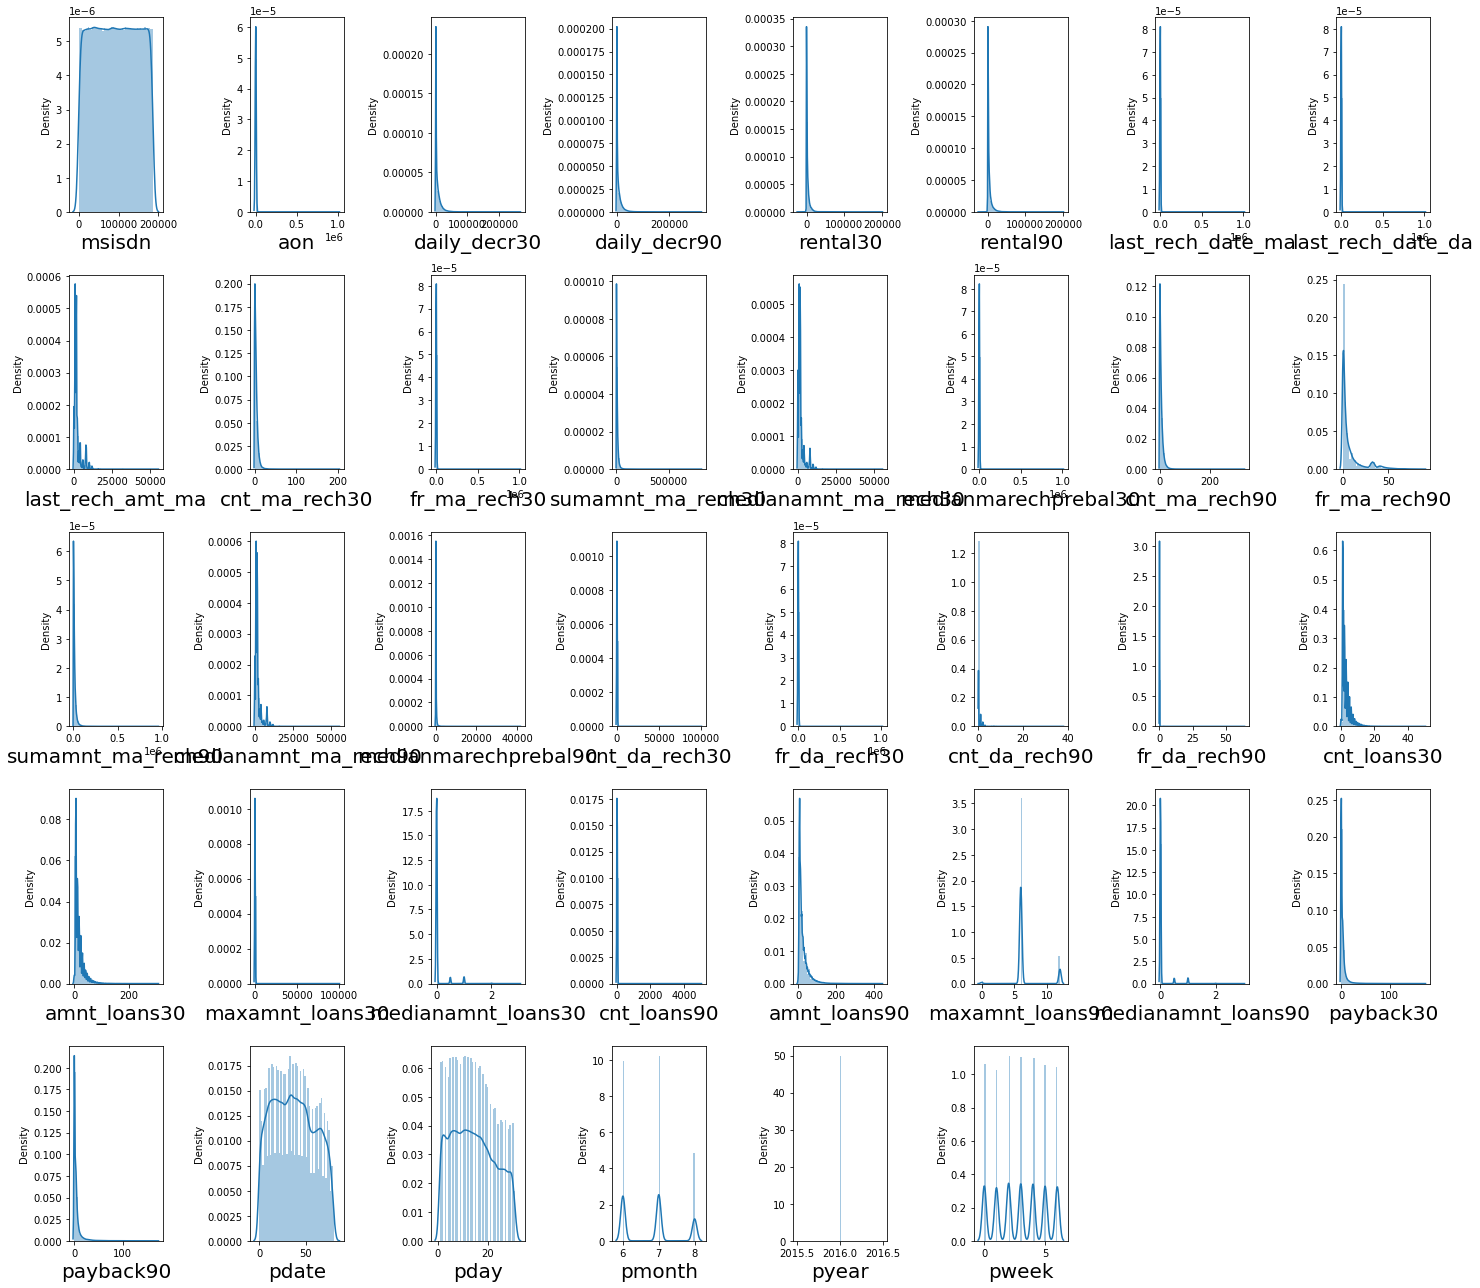

In [147]:
fig=plt.figure(figsize=(20,18))
g=1
for col in data.drop(columns=['label','pcircle']):
    if g<=38:
        ax=plt.subplot(5,8,g)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=20)
    g+=1
plt.tight_layout()

No features are distributed normally except date,day,month,week,year,msisdn.

In [23]:
data.skew()

label                   -2.270254
msisdn                   0.000719
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

All features are highly skewed normally except date,day,month,week,year,msisdn.

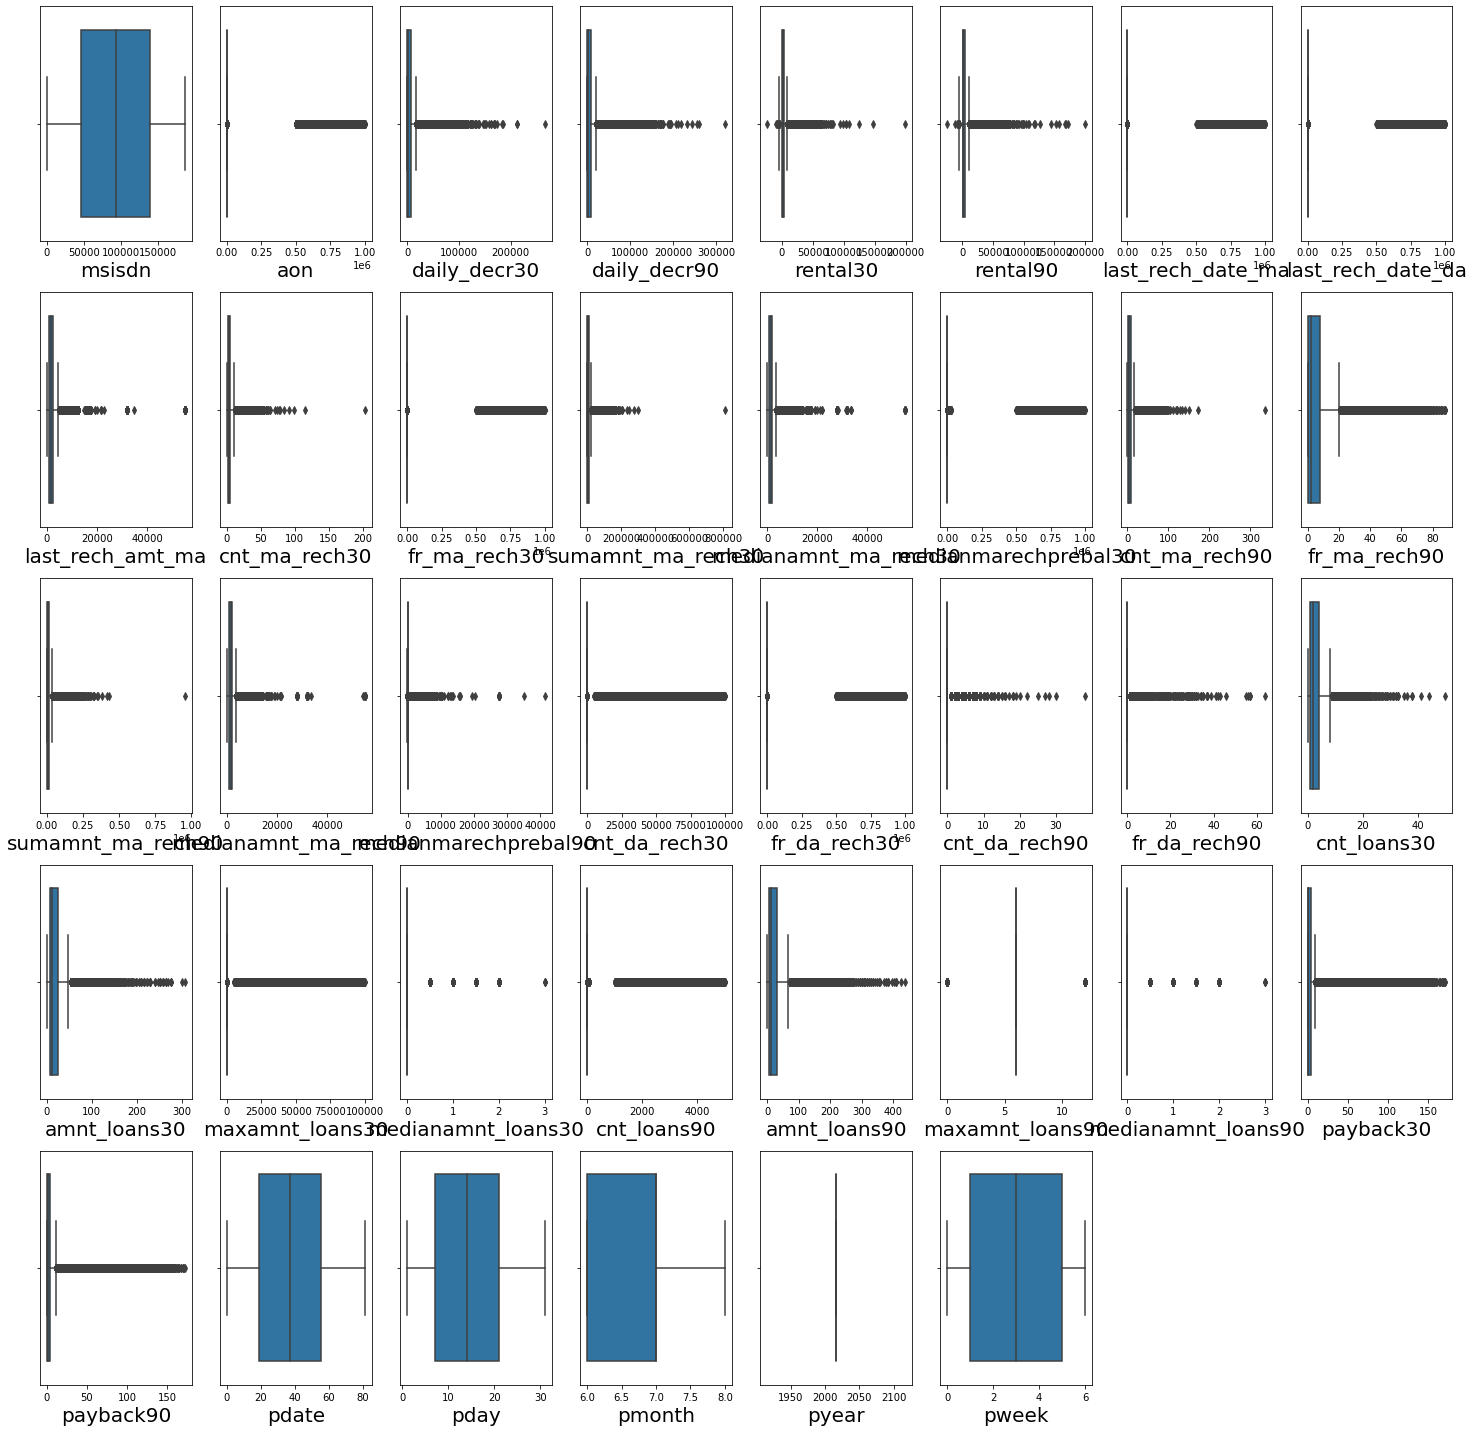

In [142]:
fig=plt.figure(figsize=(20,20))
g=1
for col in data.drop(columns=['label','pcircle']):
    if g<=38:
        ax=plt.subplot(5,8,g)
        sns.boxplot(data[col],orient='v')
        plt.xlabel(col,fontsize=20)
    g+=1
plt.tight_layout()

All features are having outiers in it except date,day,month,week,year,msisdn.

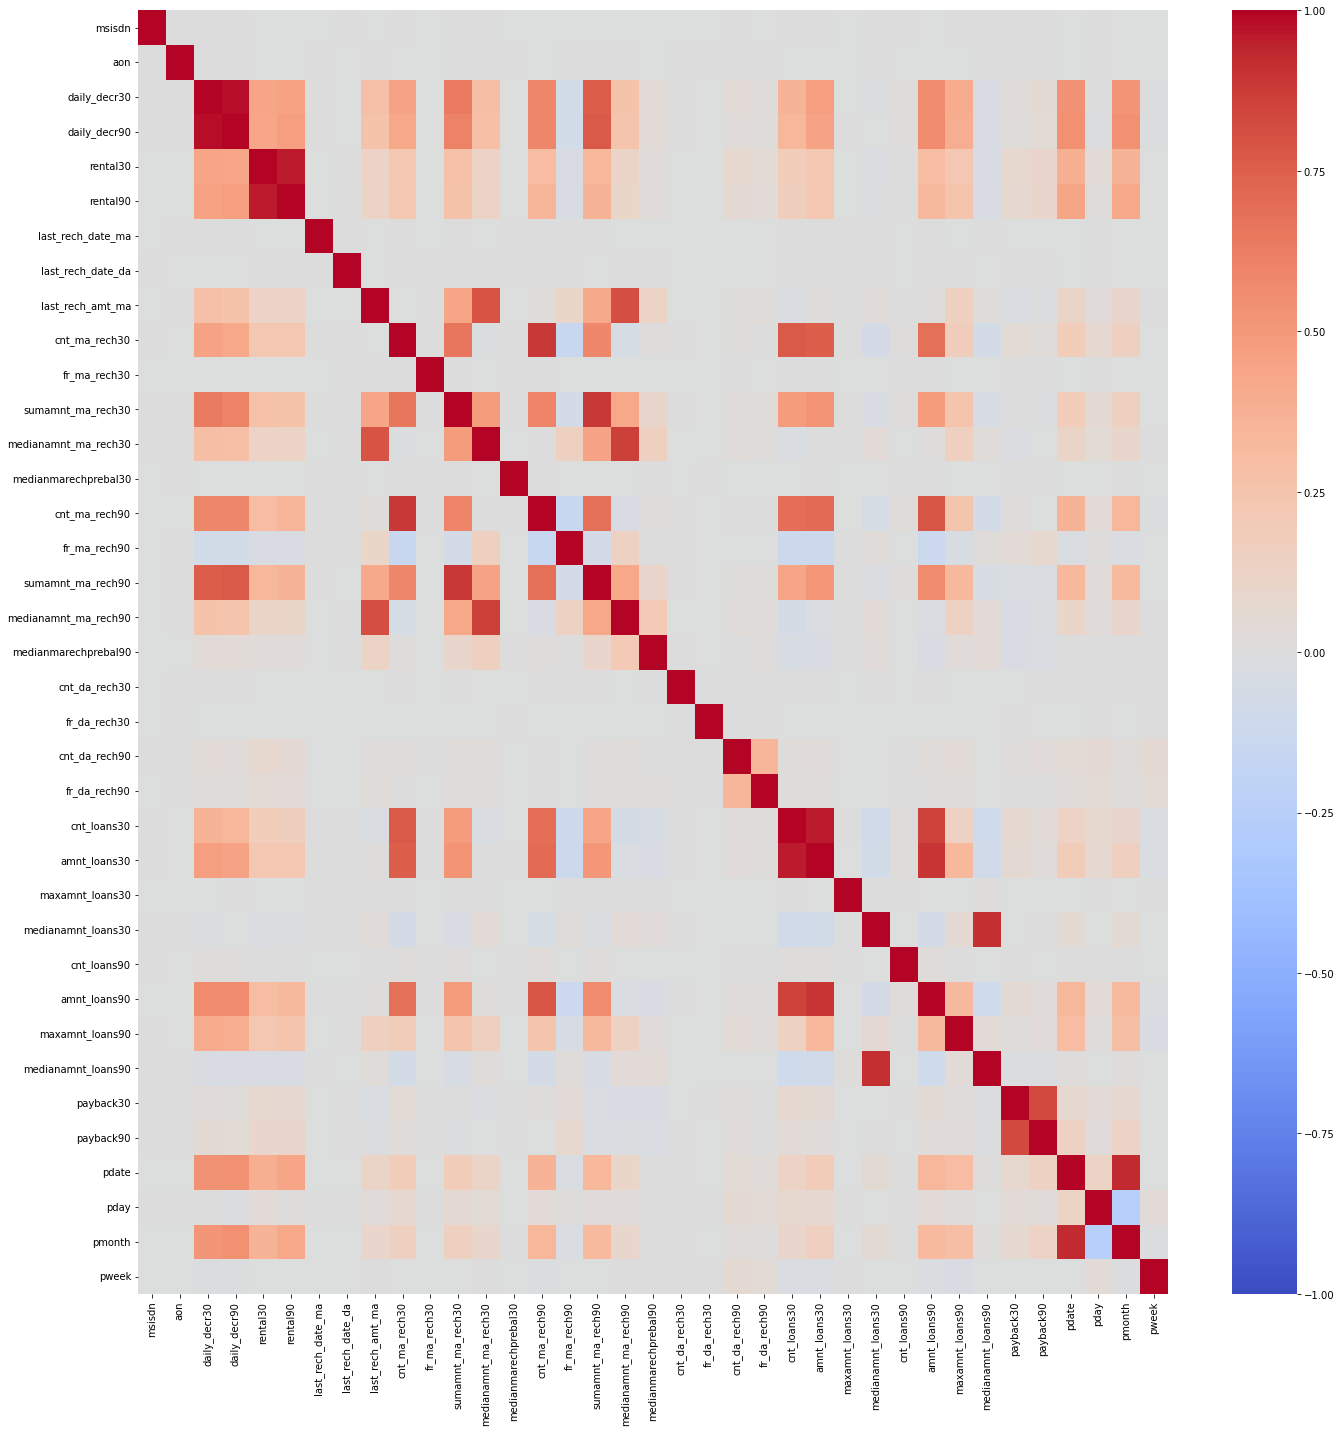

In [110]:
mask=np.triu(data.drop(columns=["label","pcircle","pyear"],axis=1).corr())
plt.figure(figsize=(20,20))
sns.heatmap(data.drop(["label","pcircle","pyear"],axis=1).corr(),vmax=1,vmin=-1,annot=False,cmap="coolwarm")
plt.tight_layout()

daily_decr30----daily_decr90

rental30------rantal90

cnt_ma_rech30------cnt_ma_rech90

sumamnt_ma_rech30-----sumamnt_ma_rech90

cnt_loans30----amnt_loans30

cnt_loans30---amnt_loans90

amnt_loans30---amnt_loans90

medianamnt_loans30-----medianamnt_loans90

pdate---pmonth 

these are features that are co-linear.

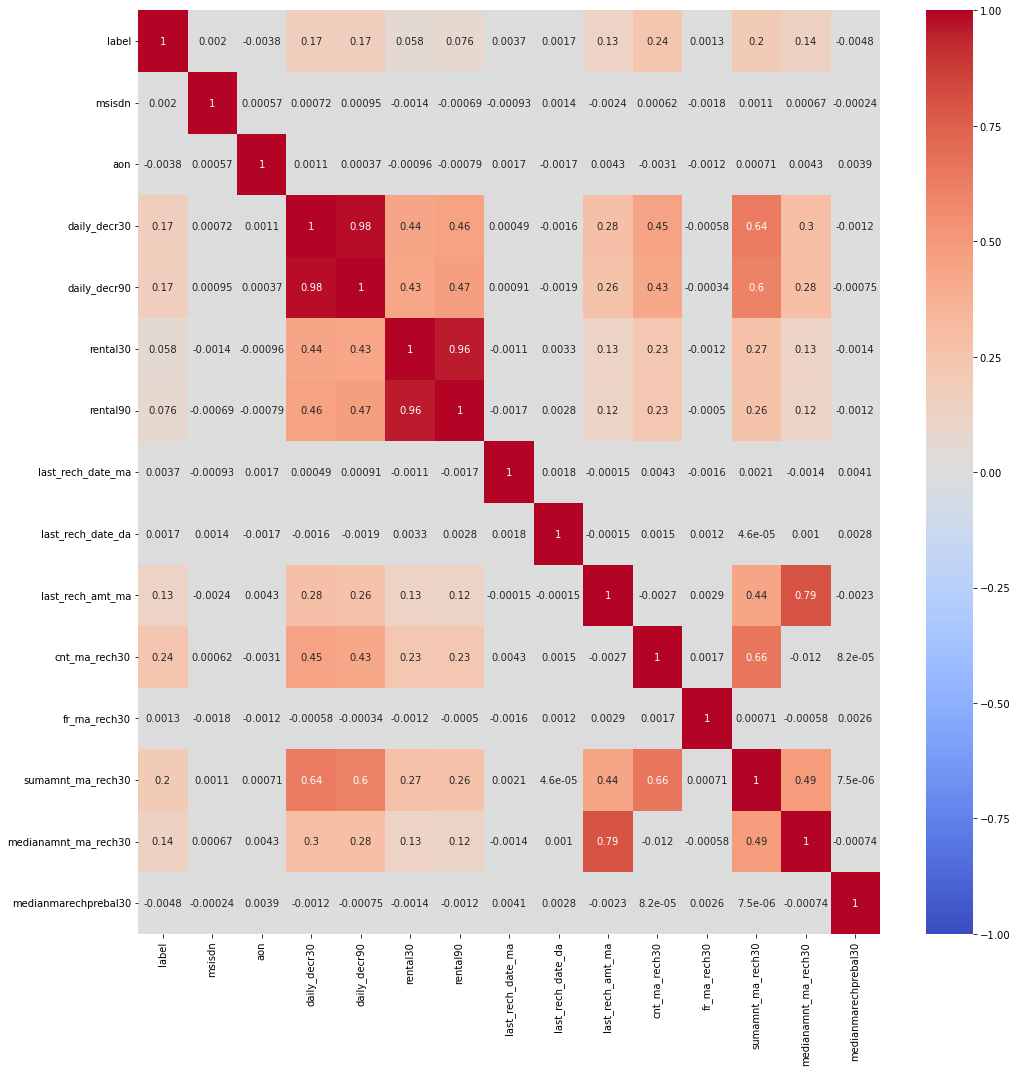

In [26]:
mask=np.triu(data.iloc[:,1:15].corr())
plt.figure(figsize=(15,15))
sns.heatmap(data.iloc[:,:15].corr(),vmax=1,vmin=-1,annot=True,cmap="coolwarm")
plt.tight_layout()

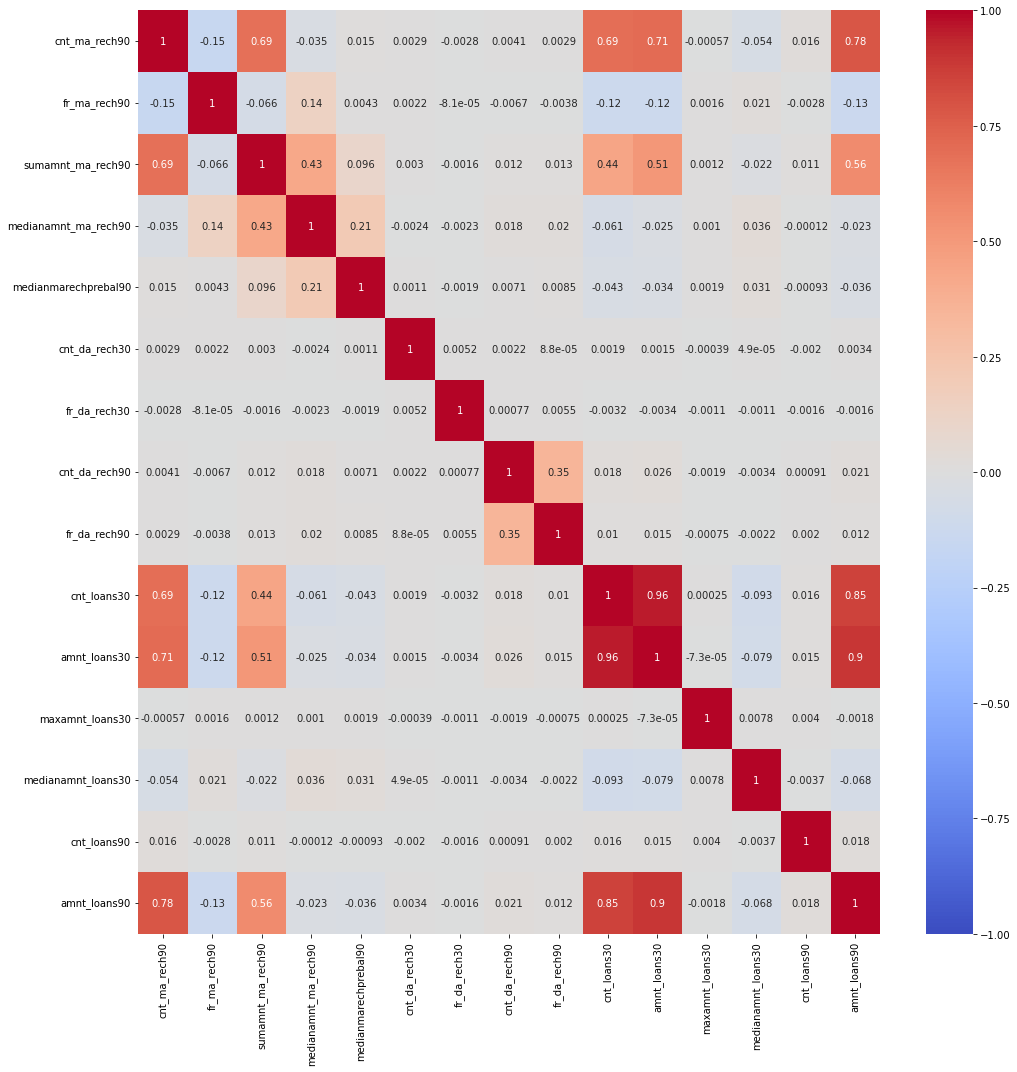

In [27]:
mask=np.triu(data.iloc[:,15:30].corr())
plt.figure(figsize=(15,15))
sns.heatmap(data.iloc[:,15:30].corr(),vmax=1,vmin=-1,annot=True,cmap="coolwarm")
plt.tight_layout()

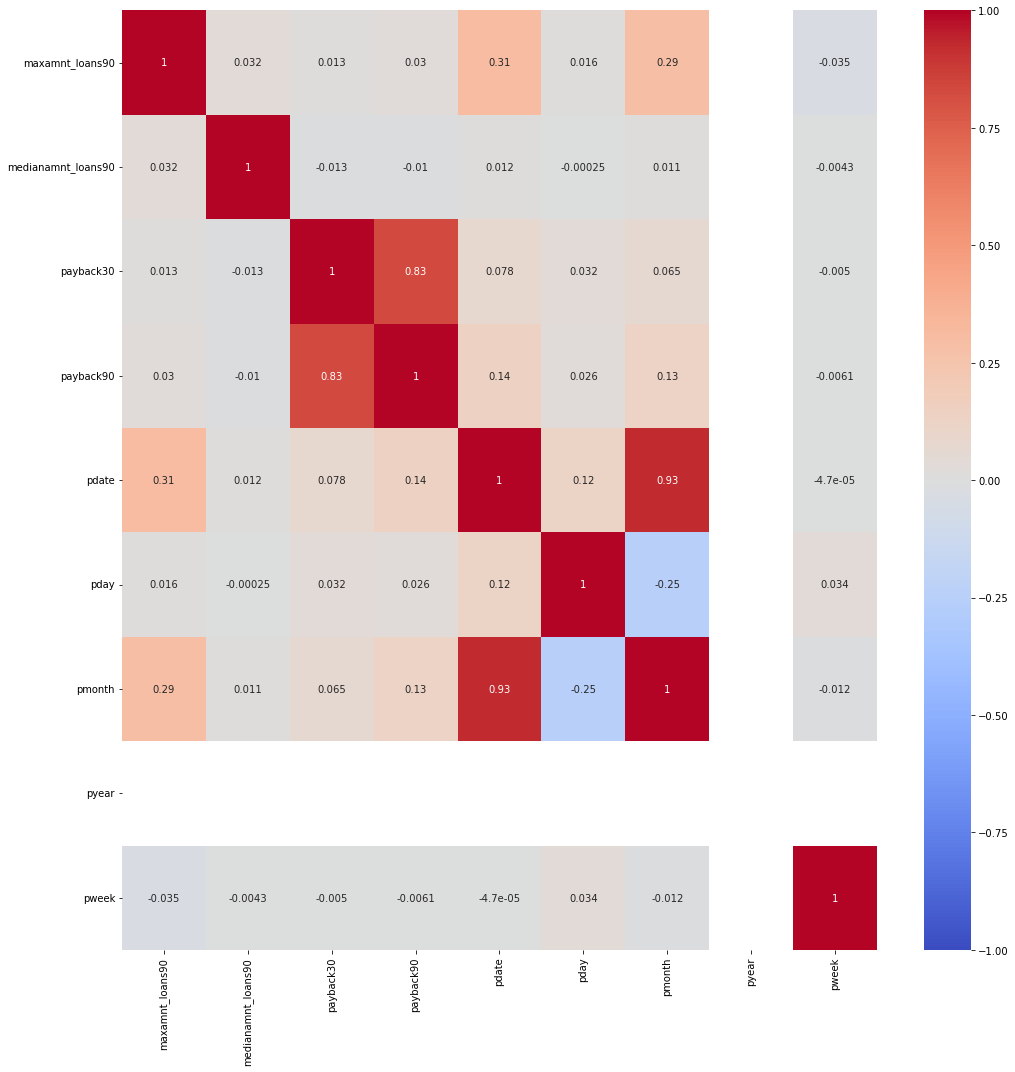

In [28]:
mask=np.triu(data.iloc[:,30:].corr())
plt.figure(figsize=(15,15))
sns.heatmap(data.iloc[:,30:].corr(),vmax=1,vmin=-1,annot=True,cmap="coolwarm")
plt.tight_layout()

<AxesSubplot:>

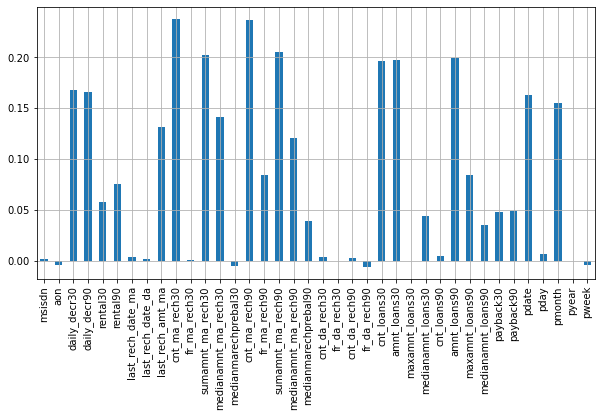

In [29]:
plt.figure(figsize=(10,5))
data.drop("label",axis=1).corrwith(data['label']).plot(kind='bar',grid=True)

Relation of features and labels.

In [30]:
data.shape

(209593, 40)

### Data Cleaning 

In [148]:
#Dropping Duplicates.
data.drop_duplicates(inplace=True)

In [149]:
data.shape

(209592, 40)

In [150]:
## Dropping Columns that leading to multi-colinearity and 
#pcircle, pyear too as these has only single values.

data.drop(columns=['daily_decr90','rental30','cnt_ma_rech90','sumamnt_ma_rech90','amnt_loans90','amnt_loans30','medianamnt_loans90','pmonth'],inplace=True)
data.drop(columns=['pcircle','pyear'],inplace=True)

In [151]:
data.shape

(209592, 30)

In [152]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
label,209592.0,0.875177,0.330519,0.000000,1.0000,1.000000,1.0000,1.000000
msisdn,209592.0,93100.358902,53758.424281,0.000000,46505.7500,93072.500000,139625.2500,186242.000000
aon,209592.0,8112.380399,75696.261220,-48.000000,246.0000,527.000000,982.0000,999860.755168
daily_decr30,209592.0,5381.412999,9220.644093,-93.012667,42.4395,1469.091833,7244.0960,265926.000000
rental90,209592.0,3483.407309,5770.475034,-24720.580000,300.2600,1334.000000,4201.7925,200148.110000
last_rech_date_ma,209592.0,3755.865715,53906.020204,-29.000000,1.0000,3.000000,7.0000,998650.377733
last_rech_date_da,209592.0,3712.220632,53374.960145,-29.000000,0.0000,0.000000,0.0000,999171.809410
last_rech_amt_ma,209592.0,2064.458973,2370.790003,0.000000,770.0000,1539.000000,2309.0000,55000.000000
cnt_ma_rech30,209592.0,3.978053,4.256099,0.000000,1.0000,3.000000,5.0000,203.000000
fr_ma_rech30,209592.0,3737.372947,53643.752523,0.000000,0.0000,2.000000,6.0000,999606.368132


In [153]:
data=data[(data['daily_decr30']>=0)&(data['aon']>=0)&(data['last_rech_date_ma']>=0)&(data['last_rech_date_da']>=0)&(data['aon']<18000)&(data['last_rech_date_ma']<18000)&(data['last_rech_date_da']<18000)]

Here I removed such columns that are negative like no. of days on a particular network, till last day of recharge amount for main and data account,daily spent by the user amount should also be non-negative. and such records that user has more than 18000 days to keeps this means the user is keeping approx 50 years.



In [154]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
label,200818.0,0.882421,0.322110,0.00,1.000000,1.000,1.000000,1.000000
msisdn,200818.0,93084.726912,53750.402398,0.00,46500.250000,93078.000,139585.750000,186242.000000
aon,200818.0,660.497485,497.334733,1.00,249.000000,525.000,967.000000,2440.000000
daily_decr30,200818.0,5502.252918,9277.353419,0.00,47.605167,1605.000,7439.619333,265926.000000
rental90,200818.0,3540.950644,5808.169850,-24720.58,320.220000,1379.025,4284.345000,200148.110000
last_rech_date_ma,200818.0,6.181124,9.312540,0.00,1.000000,3.000,7.000000,113.000000
last_rech_date_da,200818.0,0.954312,7.115472,0.00,0.000000,0.000,0.000000,115.000000
last_rech_amt_ma,200818.0,2083.931072,2371.745194,0.00,770.000000,1539.000,2309.000000,55000.000000
cnt_ma_rech30,200818.0,4.045972,4.268195,0.00,1.000000,3.000,6.000000,203.000000
fr_ma_rech30,200818.0,3780.868959,53971.211808,0.00,0.000000,2.000,6.000000,999606.368132


In [155]:
# here in description the std> mean so using square root method to decrease the deviation for both +ve & -ve values.
feat_=data.columns.tolist()[3:-3]
for col in feat_:
    list_f=data[col].tolist()
    append_v=[]
    for i in list_f:
        if i<0:
            j=str(i)
            append_v.append(float('-'+str(np.sqrt(float(j[1:])))))
        else:
            append_v.append(np.sqrt(i))
    data[col]=append_v
        
            

In [156]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
label,200818.0,0.882421,0.322110,0.000000,1.000000,1.000000,1.000000,1.000000
msisdn,200818.0,93084.726912,53750.402398,0.000000,46500.250000,93078.000000,139585.750000,186242.000000
aon,200818.0,660.497485,497.334733,1.000000,249.000000,525.000000,967.000000,2440.000000
daily_decr30,200818.0,52.981536,51.915539,0.000000,6.899650,40.062451,86.253228,515.680133
rental90,200818.0,45.717988,38.434111,-157.227797,17.894692,37.135226,65.454908,447.379157
last_rech_date_ma,200818.0,2.027741,1.438541,0.000000,1.000000,1.732051,2.645751,10.630146
last_rech_date_da,200818.0,0.150929,0.965162,0.000000,0.000000,0.000000,0.000000,10.723805
last_rech_amt_ma,200818.0,39.802659,22.353566,0.000000,27.748874,39.230090,48.052055,234.520788
cnt_ma_rech30,200818.0,1.731078,1.024376,0.000000,1.000000,1.732051,2.449490,14.247807
fr_ma_rech30,200818.0,5.768970,61.217698,0.000000,0.000000,1.414214,2.449490,999.803165


Now data seems to be appropriate but we have looks for outliers too.

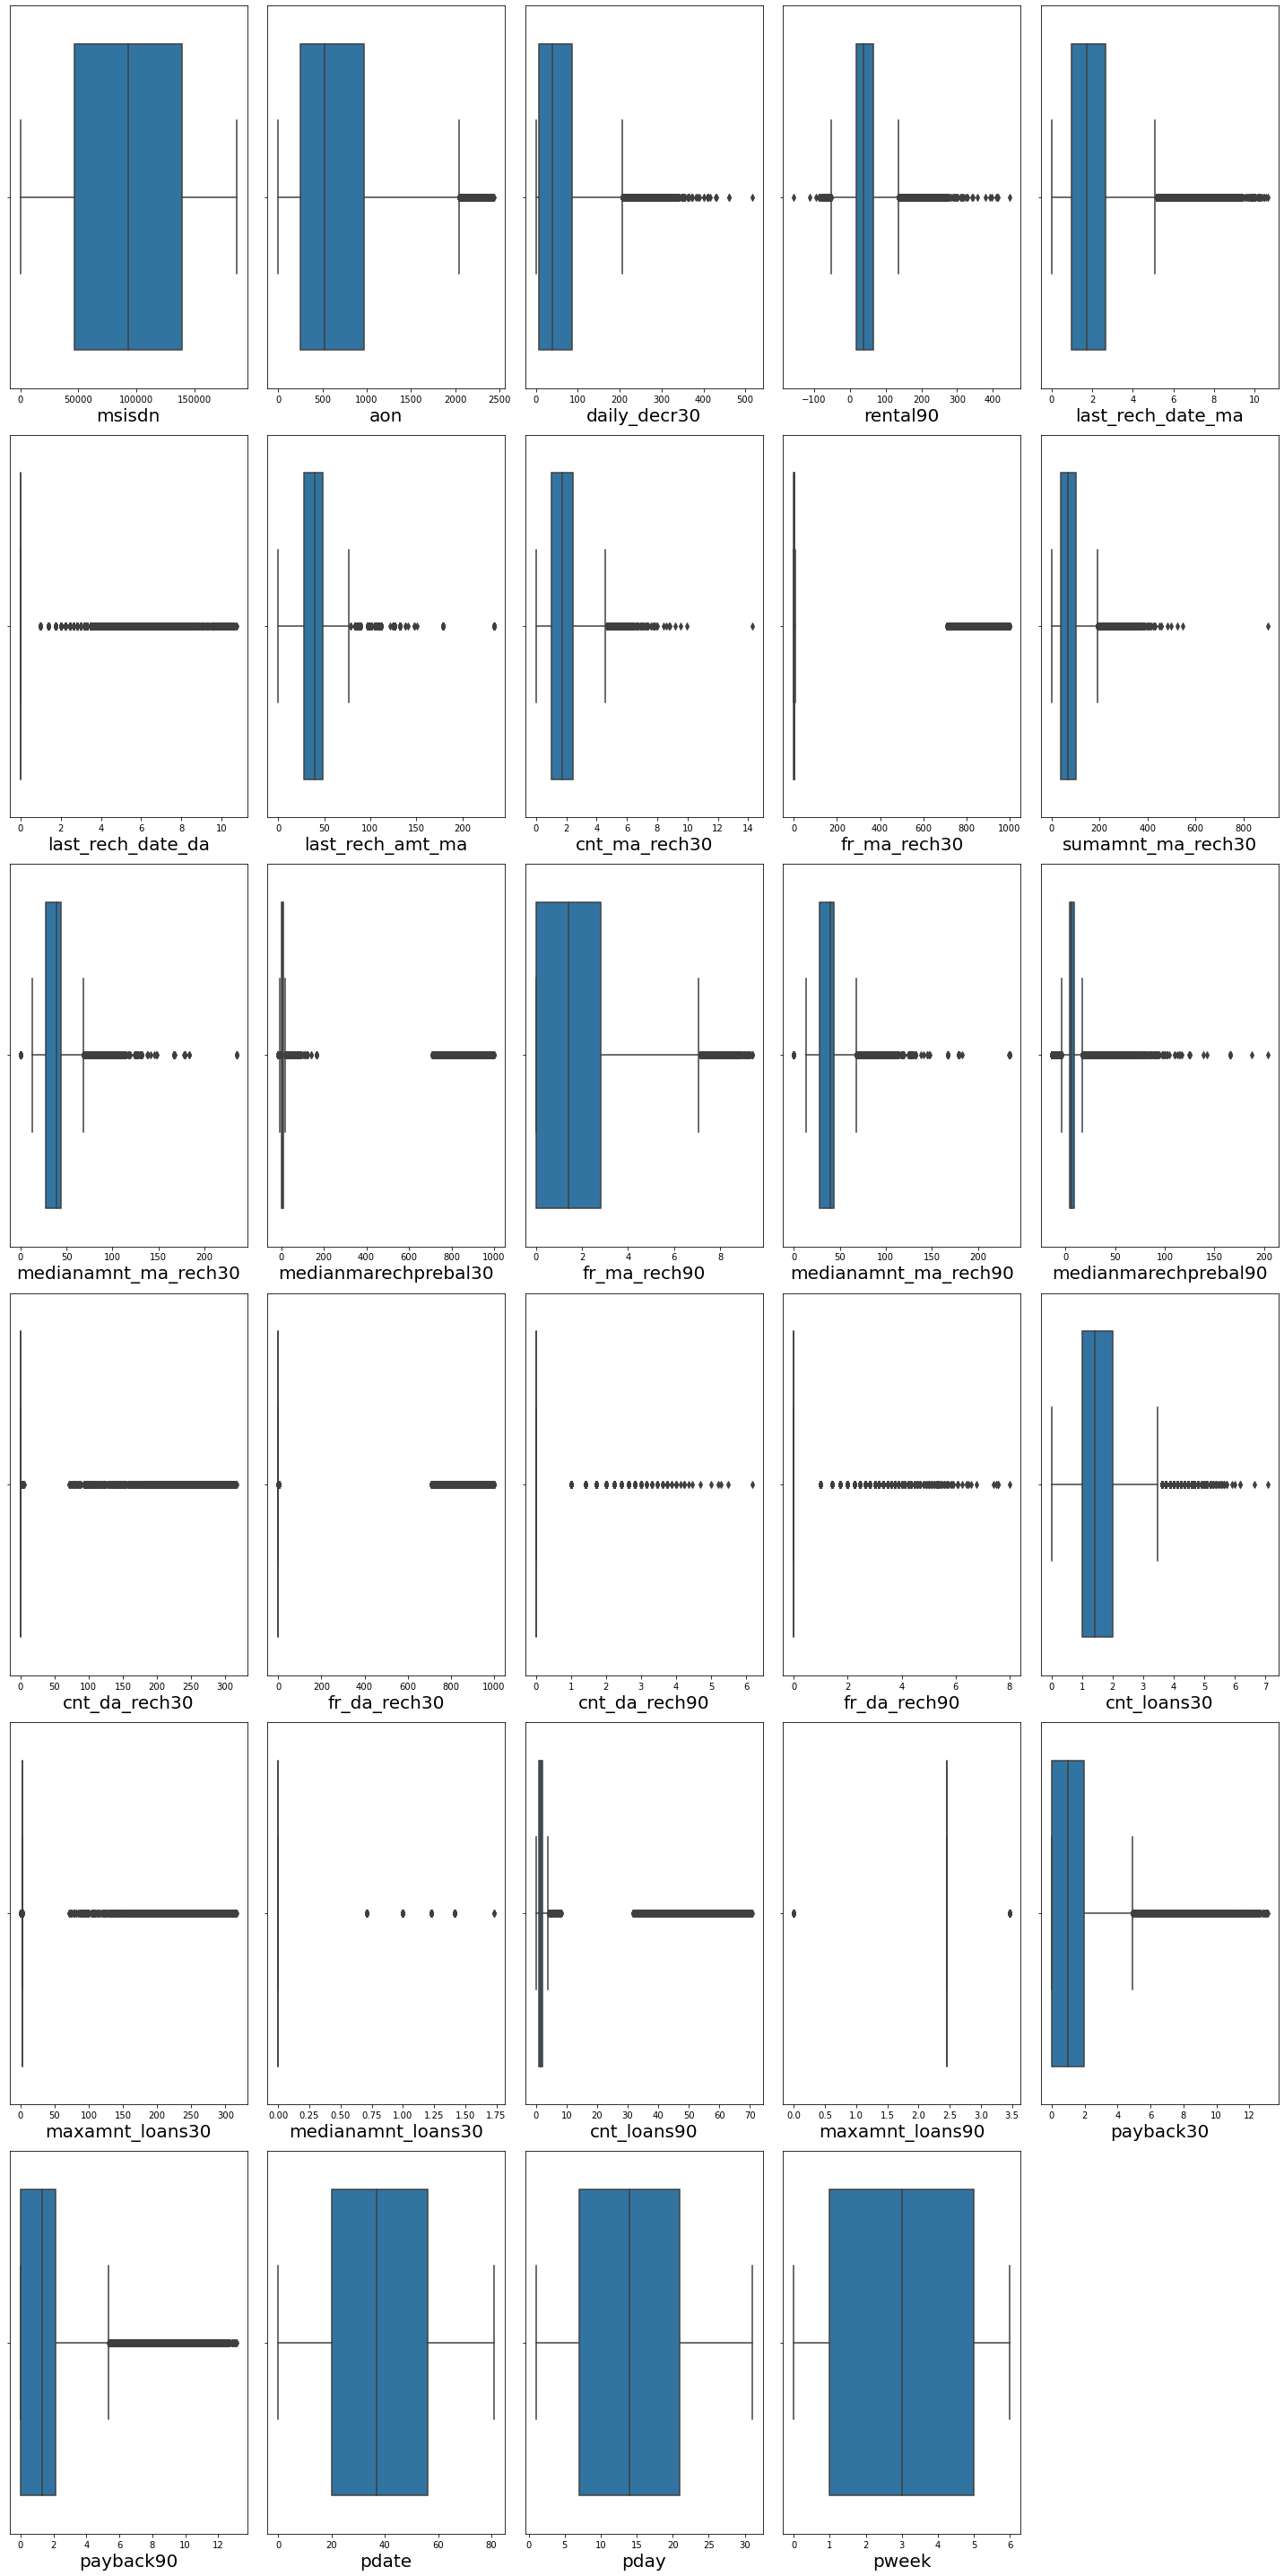

In [40]:
fig=plt.figure(figsize=(20,40))
g=1
for col in data.drop(columns=['label']):
    if g<=38:
        ax=plt.subplot(6,5,g)
        sns.boxplot(data[col],orient='v')
        plt.xlabel(col,fontsize=20)
    g+=1
plt.tight_layout()

Looks like al columns has ouliers but 'daily_decr30', 'last_rech_amt_ma','cnt_ma_rech30','sumamnt_ma_rech30', 'medianamnt_ma_rech30' , 'medianamnt_ma_rech90','medianmarechprebal90'  these columns has such very less no. records that are not usual. While others columns are seems to be continous. 

#### Removing Ouliers with `Z-score` technique.

In [157]:
from scipy.stats import zscore

col=['daily_decr30','last_rech_amt_ma','cnt_ma_rech30','sumamnt_ma_rech30','medianamnt_ma_rech30','medianamnt_ma_rech90','medianmarechprebal90']
zscore=zscore(data[col])
abs_Zscore=np.abs(zscore)
filtered=(abs_Zscore<3).all(axis=1)
data=data[filtered]

#### Showing the distribution of dataset. after cleaning data.

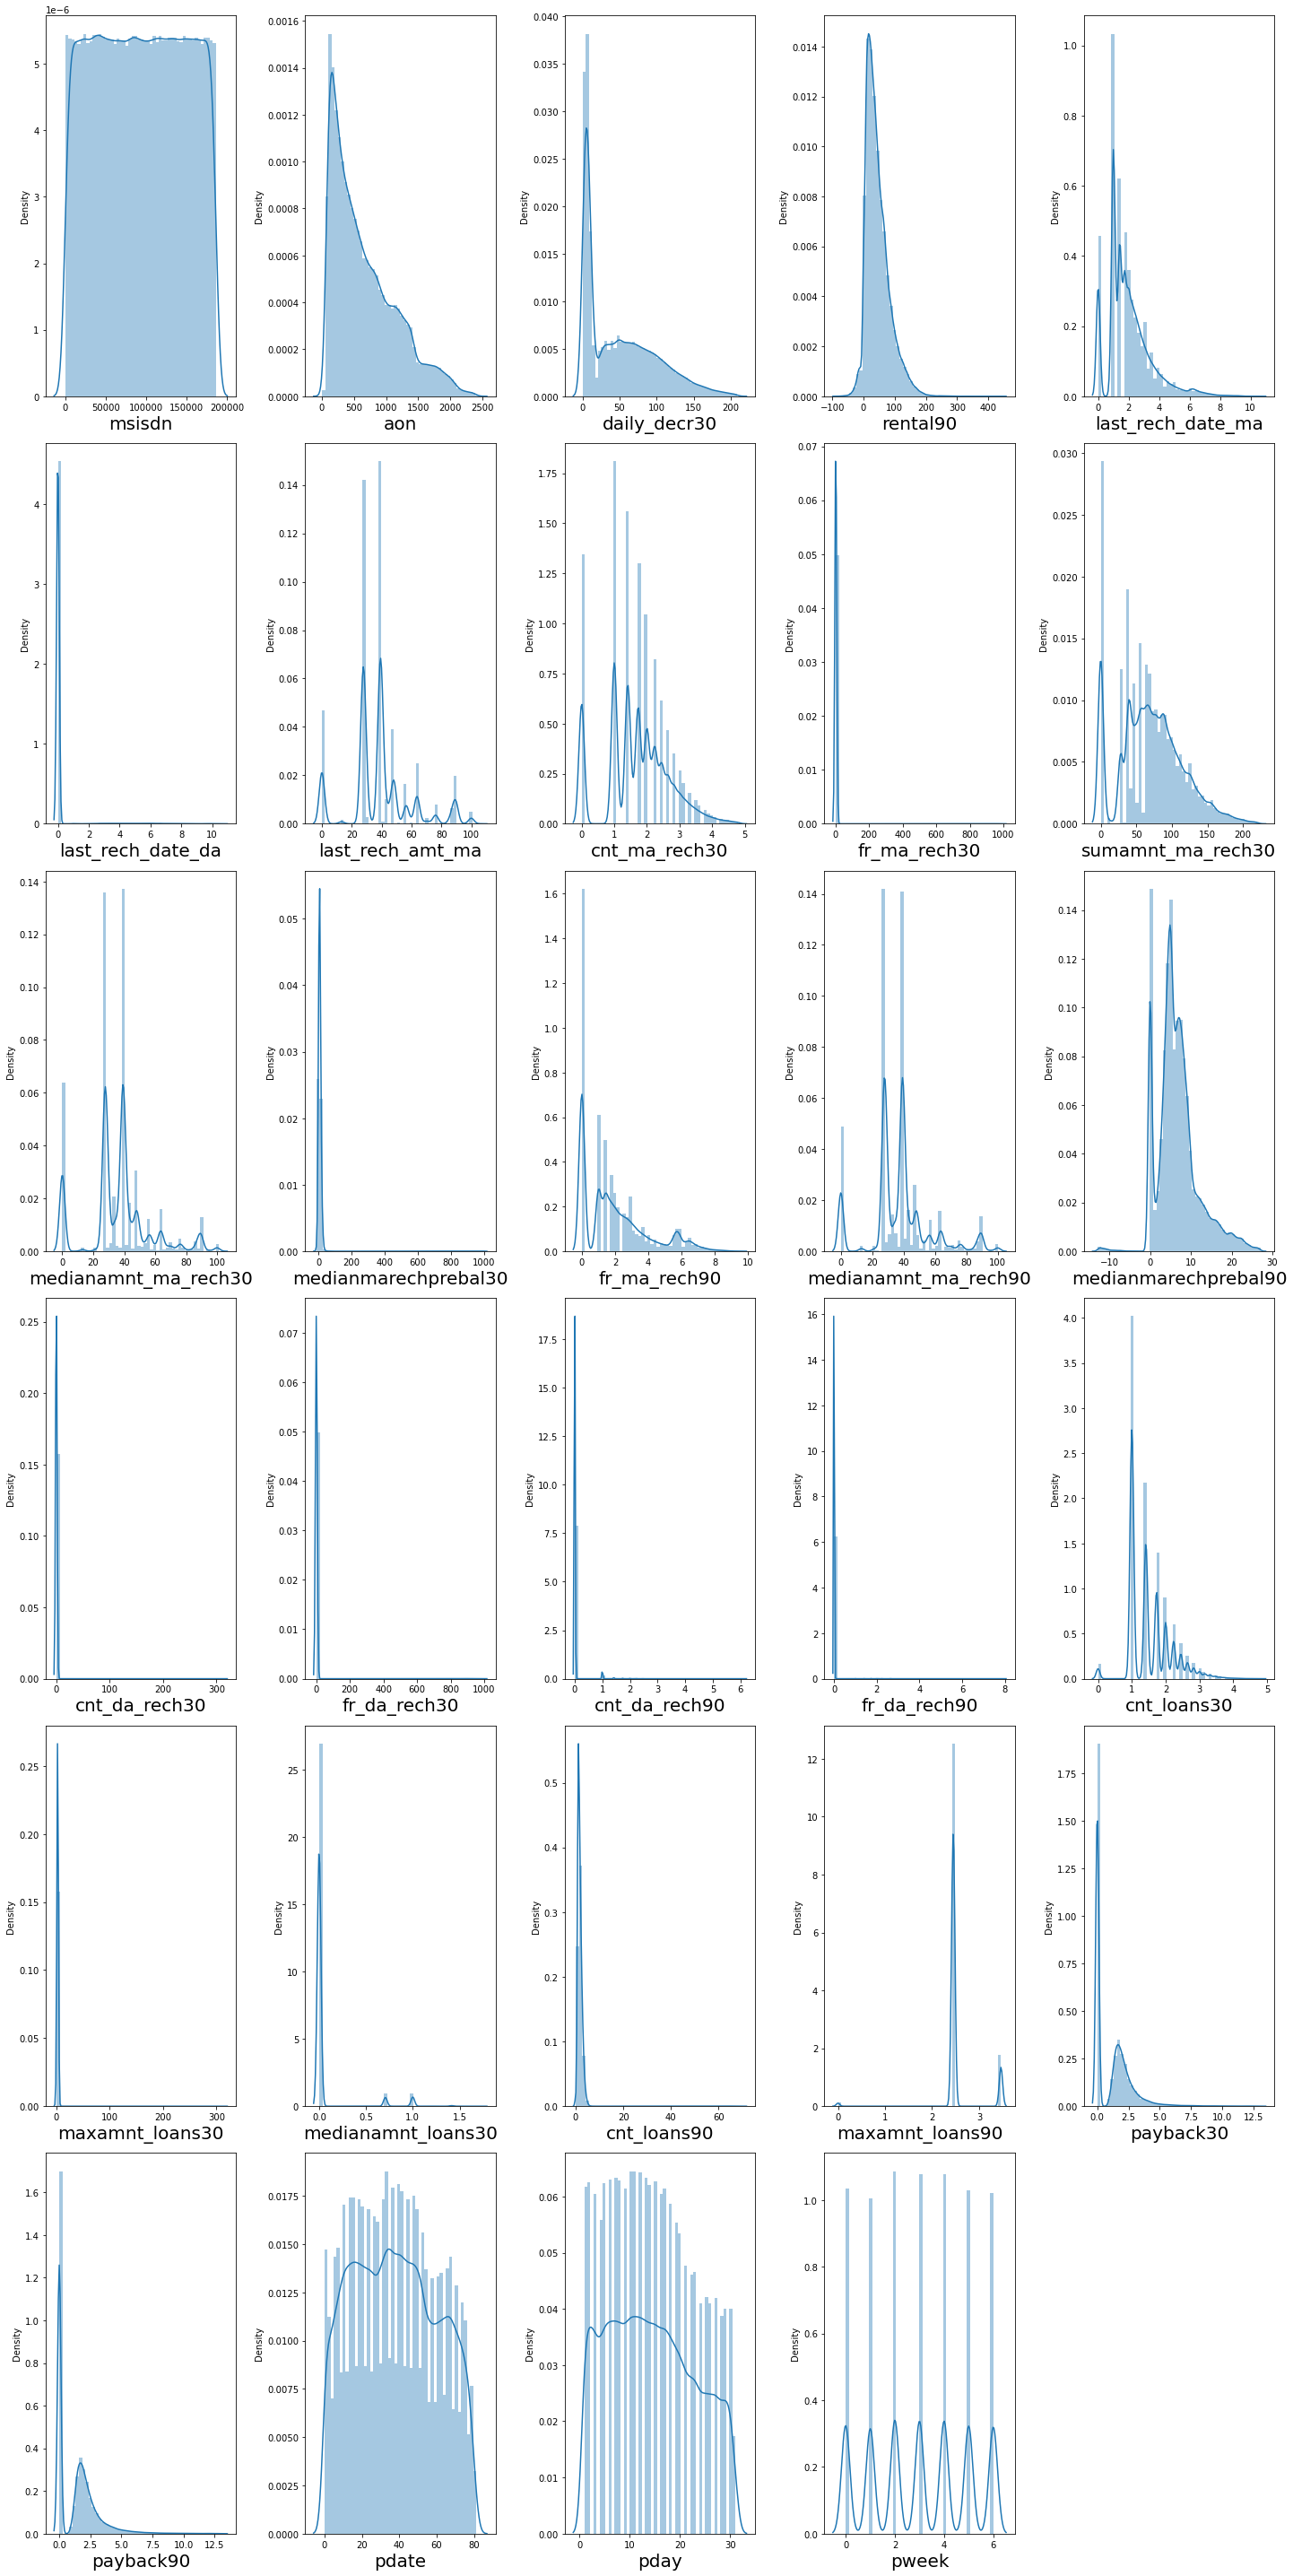

In [45]:
fig=plt.figure(figsize=(20,40))
g=1
for col in data.drop(columns=['label']):
    if g<=38:
        ax=plt.subplot(6,5,g)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=20)
    g+=1
plt.tight_layout()

In [46]:
data.skew()

label                   -2.342870
msisdn                   0.000549
aon                      0.957559
daily_decr30             0.842207
rental90                 1.177412
last_rech_date_ma        1.333783
last_rech_date_da        7.062906
last_rech_amt_ma         0.577746
cnt_ma_rech30            0.114015
fr_ma_rech30            14.137471
sumamnt_ma_rech30        0.321716
medianamnt_ma_rech30     0.423531
medianmarechprebal30    14.122863
fr_ma_rech90             1.017759
medianamnt_ma_rech90     0.542605
medianmarechprebal90     0.895976
cnt_da_rech30           15.448212
fr_da_rech30            14.158886
cnt_da_rech90            8.234461
fr_da_rech90            19.889261
cnt_loans30              0.886300
maxamnt_loans30         15.535428
medianamnt_loans30       3.707513
cnt_loans90             13.896821
maxamnt_loans90         -0.908208
payback30                1.866032
payback90                1.734379
pdate                    0.103203
pday                     0.194278
pweek         

'aon','daily_decr30','rental90','last_rech_date_ma','last_rech_date_da','last_rech_amt_ma','fr_ma_rech30','medianmarechprebal30','fr_ma_rech90','medianamnt_ma_rech90','medianmarechprebal90','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90','cnt_loans30','maxamnt_loans30','medianamnt_loans30','cnt_loans90','maxamnt_loans90','payback30','payback90' these columns are highly skewed.

##### Using `PowerTransformer` technique to reduce the skewness with `yeo-johnson` method.

In [158]:
features=['aon','daily_decr30','rental90','last_rech_date_ma','last_rech_date_da','last_rech_amt_ma','fr_ma_rech30','medianmarechprebal30','fr_ma_rech90','medianamnt_ma_rech90','medianmarechprebal90','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90','cnt_loans30','maxamnt_loans30','medianamnt_loans30','cnt_loans90','maxamnt_loans90','payback30','payback90']
scalar=PowerTransformer(method='yeo-johnson')
data[features]=scalar.fit_transform(data[features].values)
data[features].head()

,aon,daily_decr30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,medianmarechprebal30,fr_ma_rech90,medianamnt_ma_rech90,...,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback30,payback90
1,-0.707655,0.483379,-0.723971,-0.287705,-0.166993,0.102096,1.392308,-0.300424,1.254820,0.170874,...,-0.087247,-0.161774,-0.063988,-0.080564,-0.055760,-0.268823,-0.204782,-0.286650,1.729163,1.705879
2,0.401905,1.144693,0.474188,1.561264,-0.166993,1.636598,-1.215279,0.169413,-1.289998,1.846695,...,-0.087247,-0.161774,-0.063988,-0.839712,0.892025,-0.268823,-0.922472,2.398411,-0.973062,-1.062710
3,0.047407,0.153280,-0.326525,-0.025495,-0.166993,0.102096,-1.215279,0.193577,-1.289998,0.170874,...,-0.087247,-0.161774,-0.063988,-0.839712,-0.055760,-0.268823,-0.922472,-0.286650,-0.973062,-1.062710
4,-0.831192,-1.140821,-0.830912,2.316402,-0.166993,-0.291449,-1.215279,-0.764850,-1.289998,-0.252118,...,-0.087247,-0.161774,-0.063988,-0.080564,-0.055760,-0.268823,-0.204782,-0.286650,-0.973062,-1.062710
5,0.778624,-0.628944,-0.240481,0.176792,-0.166993,0.492236,0.337454,-0.026882,0.024056,0.857453,...,-0.087247,-0.161774,-0.063988,1.636152,-0.055760,-0.268823,1.063089,-0.286650,0.697282,0.498630


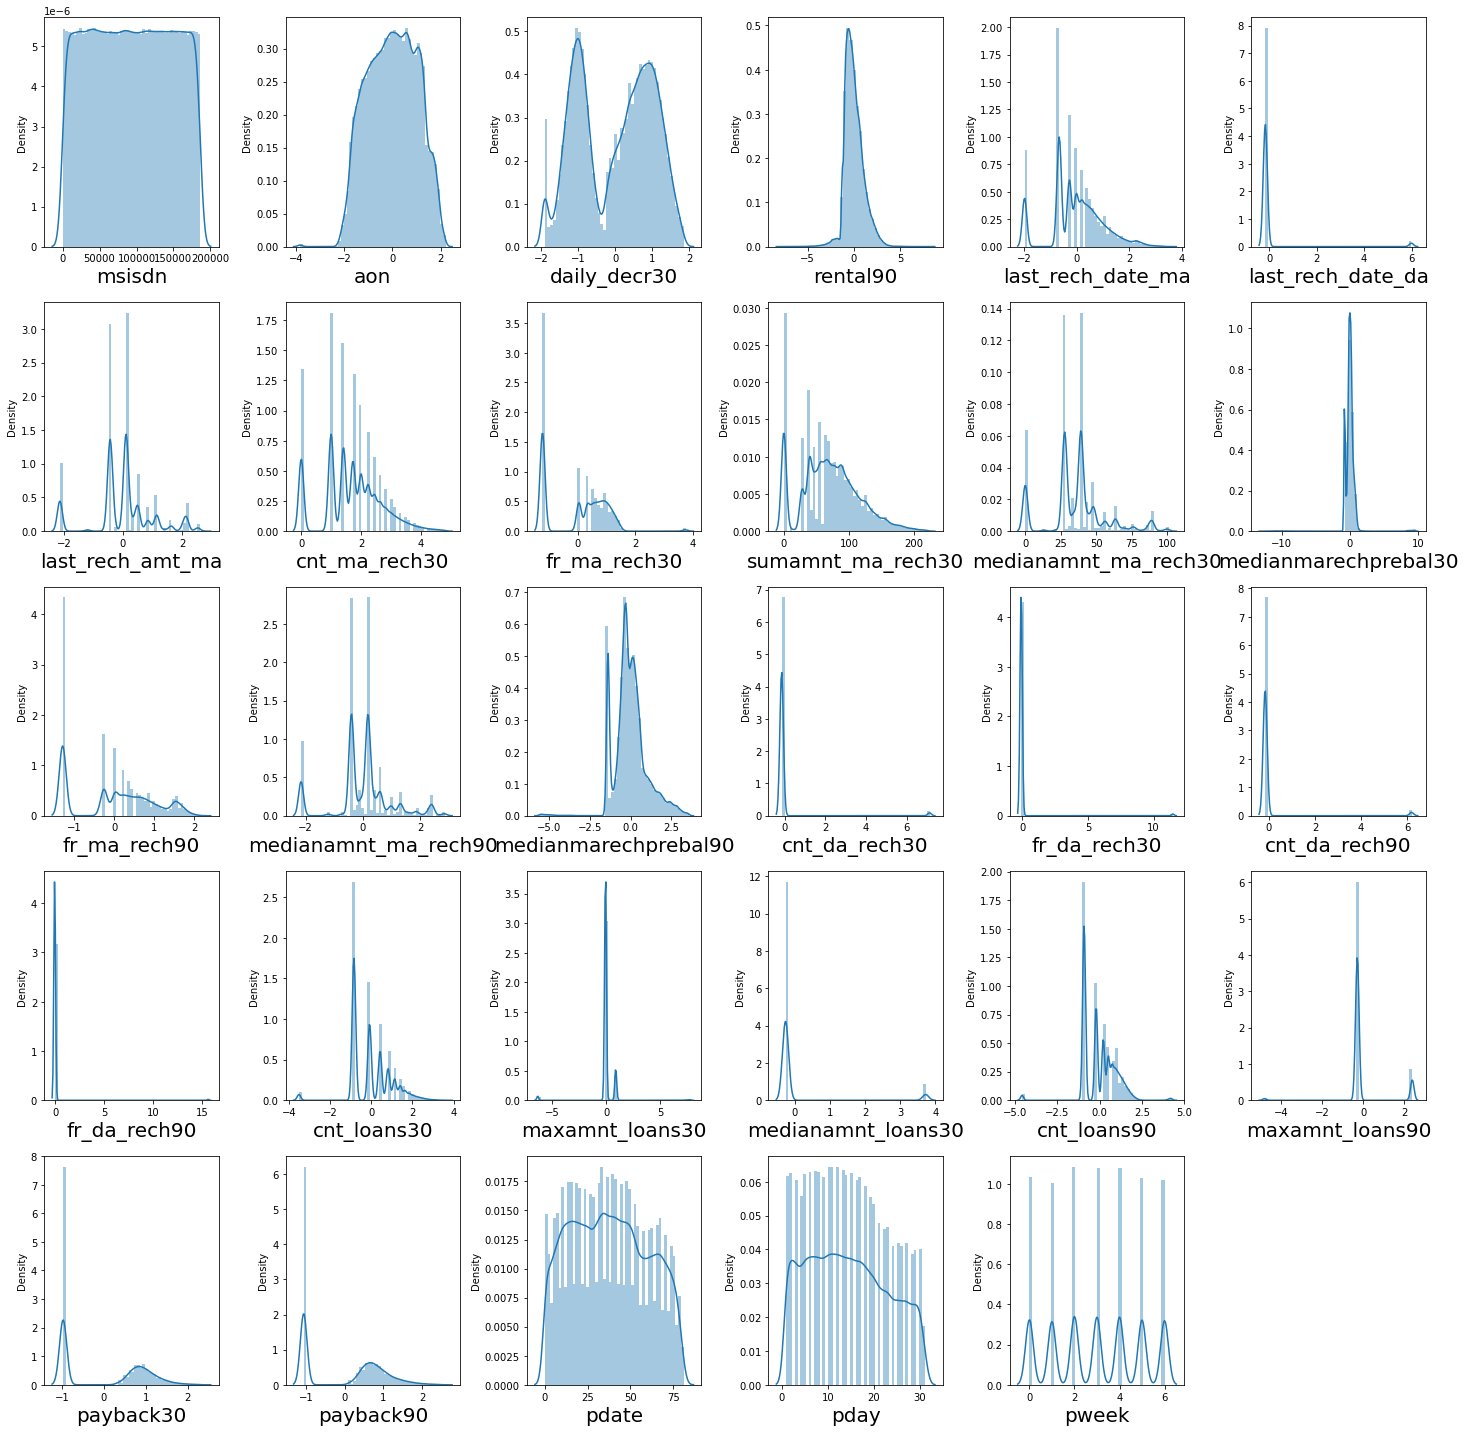

In [159]:
fig=plt.figure(figsize=(20,20))
g=1
for col in data.drop(columns=['label']):
    if g<=38:
        ax=plt.subplot(5,6,g)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=20)
    g+=1
plt.tight_layout()

In [49]:
data.skew()

label                   -2.342870
msisdn                   0.000549
aon                     -0.052697
daily_decr30            -0.135416
rental90                 0.432104
last_rech_date_ma        0.006976
last_rech_date_da        5.821311
last_rech_amt_ma        -0.100118
cnt_ma_rech30            0.114015
fr_ma_rech30             0.011291
sumamnt_ma_rech30        0.321716
medianamnt_ma_rech30     0.423531
medianmarechprebal30    -0.268443
fr_ma_rech90             0.004727
medianamnt_ma_rech90    -0.081760
medianmarechprebal90     0.233687
cnt_da_rech30            6.974041
fr_da_rech30            11.374503
cnt_da_rech90            6.019753
fr_da_rech90            15.563951
cnt_loans30              0.011785
maxamnt_loans30         -1.662592
medianamnt_loans30       3.451120
cnt_loans90             -0.270313
maxamnt_loans90          0.604589
payback30                0.178890
payback90                0.087743
pdate                    0.103203
pday                     0.194278
pweek         

In [50]:
data.shape

(192995, 30)

In [51]:
## Data Loss

print(f"Data loss is {round((209592-192995)*100/209592,2)}%")

Data loss is 7.92%


In [25]:
##Splitting features and Labels

features=data.drop(columns=["label"])
target=data.label

#### Feature Selection

In [29]:
## Feature Selection
from sklearn.feature_selection import SelectKBest,f_classif
best_feature=SelectKBest(score_func=f_classif,k=24)
fit=best_feature.fit(features,target)
df_score=pd.DataFrame(fit.scores_,columns=['Feature_score'])
df_columns=pd.DataFrame(features.columns,columns=['Feature_Name'])
feature_score=pd.concat([df_columns,df_score],axis=1)
feature_score.sort_values(['Feature_score'],ascending=False)

,Feature_Name,Feature_score
7,cnt_ma_rech30,22514.246751
9,sumamnt_ma_rech30,21547.184154
2,daily_decr30,12742.833851
8,fr_ma_rech30,12488.182077
25,payback90,11657.791866
6,last_rech_amt_ma,11571.763749
10,medianamnt_ma_rech30,10984.173800
24,payback30,10834.668825
13,medianamnt_ma_rech90,10640.208990
22,cnt_loans90,9900.040771


In [30]:
top=feature_score.nlargest(24,'Feature_score')
top

,Feature_Name,Feature_score
7,cnt_ma_rech30,22514.246751
9,sumamnt_ma_rech30,21547.184154
2,daily_decr30,12742.833851
8,fr_ma_rech30,12488.182077
25,payback90,11657.791866
6,last_rech_amt_ma,11571.763749
10,medianamnt_ma_rech30,10984.173800
24,payback30,10834.668825
13,medianamnt_ma_rech90,10640.208990
22,cnt_loans90,9900.040771


In [31]:
colName=top.Feature_Name.tolist()

newX=data[colName]
newX.head()

,cnt_ma_rech30,sumamnt_ma_rech30,daily_decr30,fr_ma_rech30,payback90,last_rech_amt_ma,medianamnt_ma_rech30,payback30,medianamnt_ma_rech90,cnt_loans90,...,medianmarechprebal30,rental90,aon,maxamnt_loans90,last_rech_date_ma,medianamnt_loans30,last_rech_date_da,cnt_da_rech90,pday,fr_da_rech90
1,1.414214,55.479726,0.483379,1.392308,1.705879,0.102096,39.230090,1.729163,0.170874,-0.204782,...,-0.300424,-0.723971,-0.707655,-0.286650,-0.287705,-0.268823,-0.166993,-0.161774,20,-0.063988
2,1.000000,76.072334,1.144693,-1.215279,-1.062710,1.636598,76.072334,-0.973062,1.846695,-0.922472,...,0.169413,0.474188,0.401905,2.398411,1.561264,-0.268823,-0.166993,-0.161774,10,-0.063988
3,1.000000,39.230090,0.153280,-1.215279,-1.062710,0.102096,39.230090,-0.973062,0.170874,-0.922472,...,0.193577,-0.326525,0.047407,-0.286650,-0.025495,-0.268823,-0.166993,-0.161774,19,-0.063988
4,0.000000,0.000000,-1.140821,-1.215279,-1.062710,-0.291449,0.000000,-0.973062,-0.252118,-0.204782,...,-0.764850,-0.830912,-0.831192,-0.286650,2.316402,-0.268823,-0.166993,-0.161774,6,-0.063988
5,2.645751,141.523850,-0.628944,0.337454,0.498630,0.492236,48.052055,0.697282,0.857453,1.063089,...,-0.026882,-0.240481,0.778624,-0.286650,0.176792,-0.268823,-0.166993,-0.161774,22,-0.063988


#### Using Standard Scalar to standarized the dataset

In [32]:
scalar=StandardScaler()

X_=scalar.fit_transform(newX)

X_

array([[-0.2940915 , -0.34893014,  0.48337925, ..., -0.16177357,
         0.66296456, -0.06398846],
       [-0.71561569,  0.11620124,  1.14469339, ..., -0.16177357,
        -0.52468971, -0.06398846],
       [-0.71561569, -0.71596551,  0.15328048, ..., -0.16177357,
         0.54419913, -0.06398846],
       ...,
       [ 0.54226817,  0.58015101,  1.13262686, ..., -0.16177357,
         1.7318534 , -0.06398846],
       [ 0.54226817,  0.88807355,  1.16017094, ...,  6.18147933,
         1.25679169, -0.06398846],
       [-0.2940915 ,  0.54847605,  0.6575168 , ..., -0.16177357,
        -0.88098599, -0.06398846]])

### Balancing Dataset

<AxesSubplot:xlabel='label', ylabel='count'>

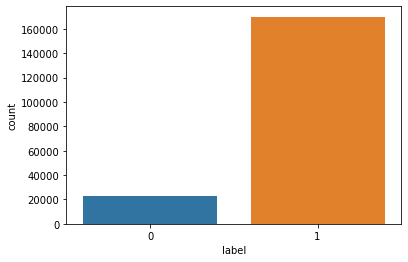

In [33]:
sns.countplot(target)

Our target variable isn't balanced. We do <b>over sampling upto 75%</b> we incresed the no. of records.

<AxesSubplot:xlabel='label', ylabel='count'>

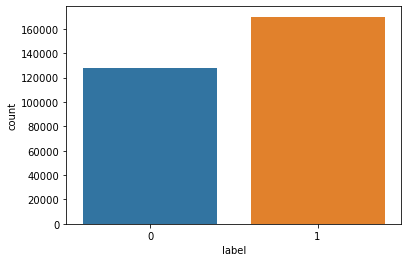

In [34]:
over_sampling=SMOTE(0.75)
X,Y=over_sampling.fit_resample(newX,target)

sns.countplot(Y)

In [35]:
X.shape

(297307, 24)

Here we incresed the records now we have total 297307 no. of records.

In [36]:
Linear=LogisticRegression()
DecisionTree=DecisionTreeClassifier()
RandomForest=RandomForestClassifier()
AdaBoost=AdaBoostClassifier()
Bagging=BaggingClassifier()
algo=[Linear,DecisionTree,RandomForest,AdaBoost,Bagging]


In [39]:
model_acc_rs={}
maximum_acc=[]
for model in algo:
    max_accuracy=0
    for i in [8,10,12]:
        X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=i)   
        model.fit(X_train,Y_train)
        Y_pred=model.predict(X_test)
        accuracy=accuracy_score(Y_test,Y_pred)*100
        if accuracy>max_accuracy:
            max_accuracy=accuracy
            rs=i
    maximum_acc.append(max_accuracy)
    model_acc_rs[model]=[max_accuracy,rs]
    
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=rs)
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)

    print(f"{model}:\n---------------------------\n---------------------------\n")
    
    print(f"The highest accuracy is {round(max_accuracy,2)}% of model {model} at random state {rs}.")
    
    print("\n\nConfusion Matrix:\n\n",confusion_matrix(Y_test,Y_pred))

    print(f"\n\n\n Classification report for the model:\n",classification_report(Y_test,Y_pred))
    

LogisticRegression():
---------------------------
---------------------------

The highest accuracy is 76.4% of model LogisticRegression() at random state 10.


Confusion Matrix:

 [[26979 11261]
 [ 9791 41162]]



 Classification report for the model:
               precision    recall  f1-score   support

           0       0.73      0.71      0.72     38240
           1       0.79      0.81      0.80     50953

    accuracy                           0.76     89193
   macro avg       0.76      0.76      0.76     89193
weighted avg       0.76      0.76      0.76     89193

DecisionTreeClassifier():
---------------------------
---------------------------

The highest accuracy is 90.29% of model DecisionTreeClassifier() at random state 8.


Confusion Matrix:

 [[34201  4063]
 [ 4560 46369]]



 Classification report for the model:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89     38264
           1       0.92      0.91      0.91     

Here we can see the highest model accuracy of each moel with their Random state,Confusion Matrix,Classification Report.

In [47]:
CVmodel={}

for model in algo:
    CVscore_={}
    print(f"\n{model}")
    print("-"*25)
    print("\n")
    for i in [5,7]:
        cvS=cross_val_score(model,X,Y,cv=i)
        CVscore_[i]=cvS.mean()
        print(f"Mean CV Score of model {model}:: {cvS.mean()} at k-fold::{i}\n")
    CVdata=pd.DataFrame(CVscore_,index=[""])
    CVmodel[str(model)]=CVdata.max(axis=1).tolist()


LogisticRegression()
-------------------------


Mean CV Score of model LogisticRegression():: 0.7627671162551393 at k-fold::5

Mean CV Score of model LogisticRegression():: 0.7628613027784239 at k-fold::7


DecisionTreeClassifier()
-------------------------


Mean CV Score of model DecisionTreeClassifier():: 0.8971469469007699 at k-fold::5

Mean CV Score of model DecisionTreeClassifier():: 0.9010251436233299 at k-fold::7


RandomForestClassifier()
-------------------------


Mean CV Score of model RandomForestClassifier():: 0.9423291963791659 at k-fold::5

Mean CV Score of model RandomForestClassifier():: 0.9454573345943319 at k-fold::7


AdaBoostClassifier()
-------------------------


Mean CV Score of model AdaBoostClassifier():: 0.8606357340734411 at k-fold::5

Mean CV Score of model AdaBoostClassifier():: 0.8624756115054728 at k-fold::7


BaggingClassifier()
-------------------------


Mean CV Score of model BaggingClassifier():: 0.9244857033718482 at k-fold::5

Mean CV Score of 

In [48]:
CVmodel

{'LogisticRegression()': [0.7628613027784239],
 'DecisionTreeClassifier()': [0.9010251436233299],
 'RandomForestClassifier()': [0.9454573345943319],
 'AdaBoostClassifier()': [0.8624756115054728],
 'BaggingClassifier()': [0.9292989576941324]}

here we can see the maximun CV score of each model

In [49]:
m=list(CVmodel.keys())

print("The least difference between the accuracy and CV score of each model is::\n")
for i in range(5):
    print(f"{m[i]}::{round(np.abs(CVmodel[m[i]][0]*100-maximum_acc[i]),2)}")

The least difference between the accuracy and CV score of each model is::

LogisticRegression()::0.11
DecisionTreeClassifier()::0.19
RandomForestClassifier()::0.06
AdaBoostClassifier()::0.54
BaggingClassifier()::0.29


here for model RandomForestClassifier() we get the least value i.e. the difference between the accuracy and cvScore of this model is 0.06

In [50]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=8)

here we split the dataset in training and testing dataset at RandomState 10

### Plotting ROC Curve

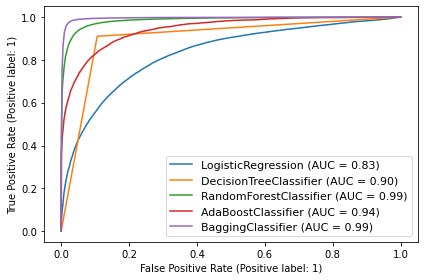

In [51]:
dis=plot_roc_curve(Linear,X_test,Y_test)
plot_roc_curve(DecisionTree,X_test,Y_test,ax=dis.ax_)
plot_roc_curve(RandomForest,X_test,Y_test,ax=dis.ax_)
plot_roc_curve(AdaBoost,X_test,Y_test,ax=dis.ax_)
plot_roc_curve(Bagging,X_test,Y_test,ax=dis.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.tight_layout()

Here we can see the bagging classifier and Random Forest has same auc score. But using RandomForest helps to get the prediction faster than Bagging.

### Hyperparameter Tuning

In [67]:
clf=RandomForestClassifier()
param={
    "n_estimators":[200,400,600,100,],
    "criterion":['gini','entropy'],
    "max_depth":[None,7,13],
    "min_samples_split":[2,4,6],
    "min_samples_leaf":[1,3]
}
grd=GridSearchCV(clf,param_grid=param)
grd.fit(X_train,Y_train)
print("Best Pramaeters:",grd.best_params_)

clf=grd.best_estimator_   #reinstantiating the best parameter to algo

clf.fit(X_train,Y_train)
ypred=clf.predict(X_test)

print("Confusion Matrix::\n",confusion_matrix(Y_test,ypred))

print(f"Accuracy:: {round(accuracy_score(Y_test,ypred)*100,2)}%")

print("Classification Report::\n",classification_report(Y_test,ypred))

Best Pramaeters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Confusion Matrix::
 [[35740  2524]
 [ 2336 48593]]
Accuracy:: 94.55%
Classification Report::
               precision    recall  f1-score   support

           0       0.94      0.93      0.94     38264
           1       0.95      0.95      0.95     50929

    accuracy                           0.95     89193
   macro avg       0.94      0.94      0.94     89193
weighted avg       0.95      0.95      0.95     89193



Very slight increase in acuracy after tuning

In [69]:
precision_score(Y_test,ypred)

0.9506230803842166

In [73]:
recall_score(Y_test,ypred)

0.9541322232912486